# Manual way to implementing a Training Pipeline for a neural network

1. Load the dataset
2. Preprocessing the data
3. Training process

  1. Creating the model
  2. Forward pass
  3. Loss calculation
  4. Backprop
  5. Parameters update
4. Model evaluation

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [4]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Label encoding for diagnosis
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# printing row 1
df.iloc[0]

,0
diagnosis,1.000000
radius_mean,17.990000
texture_mean,10.380000
perimeter_mean,122.800000
area_mean,1001.000000
smoothness_mean,0.118400
compactness_mean,0.277600
concavity_mean,0.300100
concave points_mean,0.147100
symmetry_mean,0.241900


In [8]:
# scaling all the columsn except for diagnosis (which is output)
scaler = StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

In [9]:
df.iloc[0]

,0
diagnosis,1.000000
radius_mean,1.097064
texture_mean,-2.073335
perimeter_mean,1.269934
area_mean,0.984375
smoothness_mean,1.568466
compactness_mean,3.283515
concavity_mean,2.652874
concave points_mean,2.532475
symmetry_mean,2.217515


In [10]:
# train , test split and x and y split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# printing number of features in X_train
print(X_train.shape[1])

30


In [12]:
print(y_train.shape[0])

455


In [13]:
type(y_train)

numpy.ndarray

In [14]:
x_train = torch.from_numpy(X_train).to(dtype = torch.float32)
x_test = torch.from_numpy(X_test).to(dtype = torch.float32)

In [15]:
y_train = torch.from_numpy(y_train).to(dtype = torch.float32)
y_test = torch.from_numpy(y_test).to(dtype = torch.float32)

In [16]:
# now we will start training our model

def forward(x , w , b) :
  z = torch.zeros(x.shape[0])
  for i in range (0 , x.shape[0]) :
    z[i] = torch.dot(w , x[i]) + b

  return torch.sigmoid(z)

# simply fraction of incorrect values
def loss_calculation(y_pred , y) :
    # Calculate loss
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
    return loss

def train(w,b,epoch,learning_rate, x_train, y_train) :
  for i in range (0 , epoch) :
    y_pred = forward(x_train , w , b)
    loss = loss_calculation(y_pred , y_train)
    # print epoch and loss
    # print(i , loss)
    loss.backward()
    with torch.no_grad() : # switching of gradient tracking while updating the parameters
      w -= learning_rate * w.grad
      b -= learning_rate * b.grad
      w.grad.zero_() # clearing the parameter
      b.grad.zero_()
    # training the entire batch every time

In [17]:
# calculating the accuracy :
def accuracy () :
  y_pred = forward(x_test , w , b)
  for i in range (0 , y_pred.shape[0]) :
    if(y_pred[i] > 0.5) :
      y_pred[i] = 1
    else :
      y_pred[i] = 0
  correct = 0
  for i in range (0 , y_pred.shape[0]) :
    if(y_pred[i] == y_test[i]) :
      correct += 1
  return (correct/y_pred.shape[0])
# if we increase the training the accuracy might even decrease : becuase of overfitting

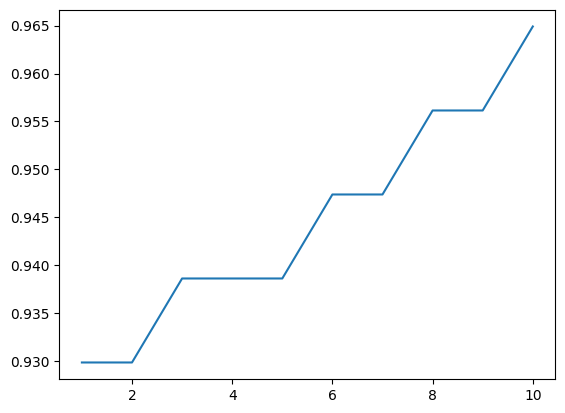

In [18]:
# use the accuracy and train function to show overfitting and plot graphs
accuracies = torch.zeros(10)
index = torch.zeros(10)



# Creating the model : assuming just one node , defining the weight and bias
w = torch.rand(X_train.shape[1] , dtype = torch.float32, requires_grad=True)
b = torch.rand(1, dtype = torch.float32 , requires_grad=True)



for i in range (0 , 10) :
  train(w,b, 100 , 0.01, x_train, y_train)
  accuracies[i] = accuracy()
  index[i] = i + 1

# plot graph between index and accuracies
import matplotlib.pyplot as plt
plt.plot(index , accuracies)
plt.show()

# Object Oriented programming in python

In [43]:
class Student :
  # constructor/ init function
  # it will always take self as an argument
  college = 'IIIT-Hyderabad'
  def __init__(self, name, age, roll_no) :
    self.name = name # instance variable
    self.__age = age # age is now private , __
    self.roll_no = roll_no

  def display_name(self) :
    print("My name is ", self.name)

  # static method : for class, not for each object
  @staticmethod
  def college_name() :
    print("Welcome to ", Student.college)

# default constructor always exist and we can have multiple constructors
s1 = Student("Manas Mittal" , 19 , '2024121003' )
print(s1.name , s1.roll_no)
print(s1)

Manas Mittal 2024121003


In [44]:
print(Student.college , s1.college)

IIIT-Hyderabad IIIT-Hyderabad


In [45]:
s1.display_name()

My name is  Manas Mittal


In [46]:
Student.college_name()

Welcome to  IIIT-Hyderabad


In [47]:
print(s1.age)

AttributeError: 'Student' object has no attribute 'age'

In [ ]:
del s1 # deleting the object

1. Abstraction : Hiding implementation details
2. Encapsulation : putting together data and related methods
3. Inheritance :
4. Polymorphism

In [ ]:
# Inheritance

class Student_IIITH(Student) : # inheriting from the
  def __init__(self, name, age, roll_no, branch) :
    super().__init__(name, age, roll_no) # calling the
    self.branch = branch

In [ ]:
s2 = Student_IIITH("Manas Mittal" , 19 , '2024121003' , 'CSE')

In [ ]:
print(s2.branch)

In [ ]:
s2.display_name()

# Using Classes to create a neural network

In [16]:
class NeuralNetwork() :
  def __init__(self, X) :
    self.w  = torch.ones(X.shape[1] , dtype = torch.float32, requires_grad=True)
    self.b = torch.ones(1, dtype = torch.float32 , requires_grad=True)

  def forward(self, x) :
    z = torch.matmul(x, self.w) + self.b
    y_pred = torch.sigmoid(z)
    return y_pred



In [17]:
model = NeuralNetwork(x_train)
print(model.w)

learning_rate = 0.01
epoch = 100

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True)


In [26]:
# simply fraction of incorrect values
def loss_calculation(y_pred , y) :
    # Calculate loss
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
    return loss

for i in range (0 , epoch) :
  y_pred = model.forward(x_train)
  loss = loss_calculation(y_pred , y_train)
  print(i , loss)
  loss.backward()
  with torch.no_grad() :
    model.w -= learning_rate * model.w.grad
    model.b -= learning_rate * model.b.grad
    model.w.grad.zero_()
    model.b.grad.zero_()

0 tensor(0.6273, grad_fn=<NegBackward0>)
1 tensor(0.6264, grad_fn=<NegBackward0>)
2 tensor(0.6255, grad_fn=<NegBackward0>)
3 tensor(0.6246, grad_fn=<NegBackward0>)
4 tensor(0.6238, grad_fn=<NegBackward0>)
5 tensor(0.6229, grad_fn=<NegBackward0>)
6 tensor(0.6220, grad_fn=<NegBackward0>)
7 tensor(0.6211, grad_fn=<NegBackward0>)
8 tensor(0.6202, grad_fn=<NegBackward0>)
9 tensor(0.6193, grad_fn=<NegBackward0>)
10 tensor(0.6184, grad_fn=<NegBackward0>)
11 tensor(0.6176, grad_fn=<NegBackward0>)
12 tensor(0.6167, grad_fn=<NegBackward0>)
13 tensor(0.6158, grad_fn=<NegBackward0>)
14 tensor(0.6149, grad_fn=<NegBackward0>)
15 tensor(0.6140, grad_fn=<NegBackward0>)
16 tensor(0.6132, grad_fn=<NegBackward0>)
17 tensor(0.6123, grad_fn=<NegBackward0>)
18 tensor(0.6114, grad_fn=<NegBackward0>)
19 tensor(0.6105, grad_fn=<NegBackward0>)
20 tensor(0.6096, grad_fn=<NegBackward0>)
21 tensor(0.6078, grad_fn=<NegBackward0>)
22 tensor(0.6069, grad_fn=<NegBackward0>)
23 tensor(0.6060, grad_fn=<NegBackward0>)
24

In [27]:
with torch.no_grad() :
  y_pred = model.forward(x_test)
  for i in range (0 , y_pred.shape[0]) :
    if(y_pred[i] > 0.5) :
      y_pred[i] = 1
    else :
      y_pred[i] = 0
  correct = 0
  for i in range (0 , y_pred.shape[0]) :
    if(y_pred[i] == y_test[i]) :
      correct += 1
  print (correct/y_pred.shape[0])

0.956140350877193


# Using Torch.NN Module to automate our training pipeline

Basic of NN module  :
1. Using pre built layers
2. Activation function ; relu , sigmoid
3. Loss function : cross entory
4. Containers like sequential
5. Other things like sequential (containarization), regularization etc.

In [43]:
class Model(torch.nn.Module) :
  # change 1 : Use NN module to define the model
  def __init__(self, num_features) :
    super().__init__()
    self.network = torch.nn.Sequential(

        torch.nn.Linear(num_features, 1) , # input and output
        torch.nn.Sigmoid()

      )

  def forward(self, features) :
    return self.network(features)
    # use model(num_features) to call the forward functoin directly

In [47]:
print(x_train.shape[1])

30


In [16]:
model = Model(x_train.shape[1])
learning_rate = 0.01
epoch = 100

NameError: name 'Model' is not defined

In [17]:
class Model2(torch.nn.Module) :
  # change 1 : Use NN module to define the model
  def __init__(self, num_features) :
    super().__init__()
    self.network = torch.nn.Sequential(

        torch.nn.Linear(num_features, 3) , # input and output
        torch.nn.ReLU() ,
        torch.nn.Linear(3,1) ,
        torch.nn.Sigmoid()
      )

  def forward(self, features) :
    return self.network(features)
    # use model(num_features) to call the forward functoin directly

In [18]:
!pip install torchinfo

In [19]:
#Creating a better model
model = Model2(x_train.shape[1])
from torchinfo import summary

summary(model, input_size=(x_train.shape[0], x_train.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
Model2                                   [455, 1]                  --
├─Sequential: 1-1                        [455, 1]                  --
│    └─Linear: 2-1                       [455, 3]                  93
│    └─ReLU: 2-2                         [455, 3]                  --
│    └─Linear: 2-3                       [455, 1]                  4
│    └─Sigmoid: 2-4                      [455, 1]                  --
Total params: 97
Trainable params: 97
Non-trainable params: 0
Total mult-adds (M): 0.04
Input size (MB): 0.05
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.07

In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [28]:
# Change 3 : using the built in loss functions
loss_fn = torch.nn.BCELoss()

for i in range (0 , 100) :
  y_pred = model(x_train)
  loss = loss_fn(y_pred, y_train.view(-1,1))
  print(i , loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


0 tensor(0.5024, grad_fn=<BinaryCrossEntropyBackward0>)
1 tensor(0.5006, grad_fn=<BinaryCrossEntropyBackward0>)
2 tensor(0.4988, grad_fn=<BinaryCrossEntropyBackward0>)
3 tensor(0.4971, grad_fn=<BinaryCrossEntropyBackward0>)
4 tensor(0.4953, grad_fn=<BinaryCrossEntropyBackward0>)
5 tensor(0.4936, grad_fn=<BinaryCrossEntropyBackward0>)
6 tensor(0.4919, grad_fn=<BinaryCrossEntropyBackward0>)
7 tensor(0.4902, grad_fn=<BinaryCrossEntropyBackward0>)
8 tensor(0.4886, grad_fn=<BinaryCrossEntropyBackward0>)
9 tensor(0.4869, grad_fn=<BinaryCrossEntropyBackward0>)
10 tensor(0.4853, grad_fn=<BinaryCrossEntropyBackward0>)
11 tensor(0.4837, grad_fn=<BinaryCrossEntropyBackward0>)
12 tensor(0.4821, grad_fn=<BinaryCrossEntropyBackward0>)
13 tensor(0.4806, grad_fn=<BinaryCrossEntropyBackward0>)
14 tensor(0.4790, grad_fn=<BinaryCrossEntropyBackward0>)
15 tensor(0.4775, grad_fn=<BinaryCrossEntropyBackward0>)
16 tensor(0.4760, grad_fn=<BinaryCrossEntropyBackward0>)
17 tensor(0.4745, grad_fn=<BinaryCrossEnt

In [29]:
with torch.no_grad() :
  y_pred = model.forward(x_test)
  for i in range (0 , y_pred.shape[0]) :
    if(y_pred[i] > 0.5) :
      y_pred[i] = 1
    else :
      y_pred[i] = 0
  correct = 0
  for i in range (0 , y_pred.shape[0]) :
    if(y_pred[i] == y_test[i]) :
      correct += 1
  print (correct/y_pred.shape[0])

0.956140350877193
